In [19]:
# pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
# pip install C:/Users/PC/Desktop/geopandas라이브러리/Shapely-1.8.2-cp310-cp310-win_amd64.whl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Processing c:\users\pc\desktop\geopandas라이브러리\shapely-1.8.2-cp310-cp310-win_amd64.whl
  Attempting uninstall: Shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1


In [17]:
# pip install C:/Users/PC/Desktop/geopandas라이브러리/GDAL-3.4.3-cp310-cp310-win_amd64.whl

Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\pc\desktop\geopandas라이브러리\gdal-3.4.3-cp310-cp310-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [18]:
# pip install C:/Users/PC/Desktop/geopandas라이브러리/Fiona-1.8.21-cp310-cp310-win_amd64.whl

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\pc\desktop\geopandas라이브러리\fiona-1.8.21-cp310-cp310-win_amd64.whl
  Attempting uninstall: Fiona
    Found existing installation: Fiona 1.8.22
    Uninstalling Fiona-1.8.22:
      Successfully uninstalled Fiona-1.8.22



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [43]:
# 라이브러리
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')

In [24]:
# 
data_origin = pd.read_csv('데이터/data_지하철_음식점.csv')
data = data_origin.copy()
data.tail()

,단지명,전용면적,계약년월,계약일,보증금(만),월세(만),층,위도,경도,지하철역,지하철까지거리m,500m내음식점갯수
1365,청계천두산위브더제니스,146.9679,202203,31,"10,500",378,28,37.566868,127.017123,신당역,117.139901,159
1366,청계천두산위브더제니스,46.7350,202208,31,"10,000",250,14,37.566868,127.017123,신당역,117.139901,159
1367,청계천두산위브더제니스,46.7350,202209,6,"20,000",400,22,37.566868,127.017123,신당역,117.139901,159
1368,청계천두산위브더제니스,46.7350,202210,14,"5,000",260,11,37.566868,127.017123,신당역,117.139901,159
1369,청계천두산위브더제니스,173.1707,202210,19,"70,000",350,27,37.566868,127.017123,신당역,117.139901,159


In [40]:
data['geometry'] = data.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
data = gpd.GeoDataFrame(data, geometry='geometry')
data.head()

C:\Users\PC\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,단지명,전용면적,계약년월,계약일,보증금(만),월세(만),층,위도,경도,지하철역,지하철까지거리m,500m내음식점갯수,geometry
0,남산트라팰리스,116.11,202201,10,"20,000",450,24,37.553995,126.975613,서울역,300.405119,54,POINT (126.97561 37.55399)
1,남산트라팰리스,116.11,202201,21,"1,000",347,26,37.553995,126.975613,서울역,300.405119,54,POINT (126.97561 37.55399)
2,남산트라팰리스,148.47,202201,28,0,675,31,37.553995,126.975613,서울역,300.405119,54,POINT (126.97561 37.55399)
3,남산트라팰리스,126.78,202204,13,0,500,6,37.553995,126.975613,서울역,300.405119,54,POINT (126.97561 37.55399)
4,남산트라팰리스,116.11,202208,10,0,493,22,37.553995,126.975613,서울역,300.405119,54,POINT (126.97561 37.55399)


In [67]:
jido = gpd.GeoDataFrame.from_file('데이터/시군구/sig.shp', encoding='cp949')
jido.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [68]:
jido = jido.loc[jido['SIG_CD']== '11140']
jido

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."


In [69]:
print(jido.crs)
print(data.crs)

None
+init=epsg:4326 +type=crs


In [44]:
data.crs = {'init':'epsg:4326'}

In [76]:
data = data.to_crs({'init':'epsg:5179'})

In [70]:
jido.crs = {'init': 'epsg:5179'}

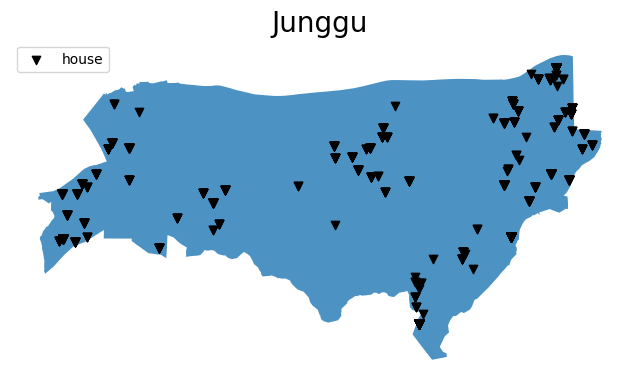

In [77]:
ax = jido.plot(column="SIG_KOR_NM", figsize=(8,8), alpha=0.8)
data.plot(ax=ax, marker='v', color= 'black', label = 'house')
ax.set_title('Junggu',fontsize = 20)
ax.set_axis_off()
plt.legend()
plt.show()

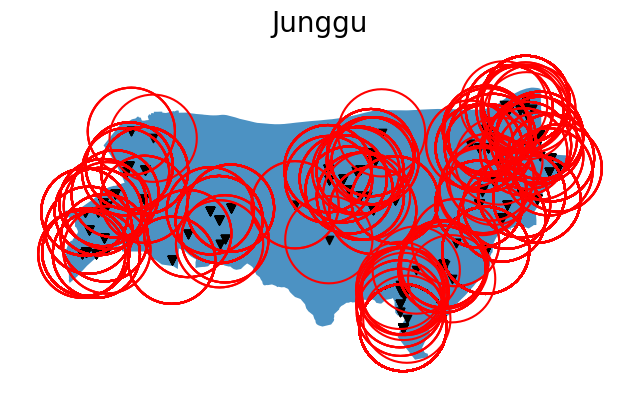

In [88]:
buffer_house = gpd.GeoDataFrame({'geometry' : data.buffer(500)})

ax = jido.plot(column="SIG_KOR_NM", figsize=(8,8), alpha=0.8)
data.plot(ax=ax, marker='v', color= 'black', label = 'house')
buffer_house.boundary.plot(ax =ax, color = 'red')
ax.set_title('Junggu',fontsize = 20)
ax.set_axis_off()
# plt.legend()
plt.show()


# 버스

In [98]:
bus = pd.read_csv('데이터/서울_버스정류장_위경도.csv')
bus['geometry'] = bus.apply(lambda row : Point([row['정류장_경도'], row['정류장_위도']]), axis=1)

bus = gpd.GeoDataFrame(bus, geometry='geometry')
bus.head()

,정류장번호,정류장명,정류장_위도,정류장_경도,geometry
0,SEB100000001,종로2가사거리,37.569765,126.987750,POINT (126.98775 37.56977)
1,SEB100000002,창경궁.서울대학교병원,37.579183,126.996566,POINT (126.99657 37.57918)
2,SEB100000003,명륜3가.성대입구,37.582671,126.998340,POINT (126.99834 37.58267)
3,SEB100000004,종로2가.삼일교,37.568579,126.987613,POINT (126.98761 37.56858)
4,SEB100000005,혜화동로터리.여운형활동터,37.586243,127.001744,POINT (127.00174 37.58624)


In [99]:
bus.crs = {'init':'epsg:4326'}
bus = bus.to_crs({'init':'epsg:5179'})

In [100]:
del_cols = ['정류장번호','정류장_위도','정류장_경도']
bus = bus.drop(columns=del_cols, axis = 1)
bus.head()

,정류장명,geometry
0,종로2가사거리,POINT (954764.170 1952389.590)
1,창경궁.서울대학교병원,POINT (955548.315 1953430.252)
2,명륜3가.성대입구,POINT (955707.030 1953816.403)
3,종로2가.삼일교,POINT (954751.372 1952258.086)
4,혜화동로터리.여운형활동터,POINT (956009.674 1954211.089)


In [124]:
print(data.crs)
print(bus.crs)

+init=epsg:5179 +type=crs
+init=epsg:4326 +type=crs


In [126]:
data = data.to_crs({'init':'epsg:4326'})

In [ ]:
dist = bus.to_crs(epsg=5186).geometry.distance()

In [110]:
example_dist = data.geometry.distance(bus.geometry)

In [114]:
exam = data.geometry.distance(bus.iloc[0].geometry)
exam.min()

991.6475894596889

In [118]:
bus.iloc[0]

정류장명                                             종로2가사거리
geometry    POINT (954764.1697777972 1952389.5896184691)
Name: 0, dtype: object

In [122]:
bus = bus.to_crs({'init':'epsg:4326'})
bus.iloc[0]

정류장명                               종로2가사거리
geometry    POINT (126.9877498 37.5697651)
Name: 0, dtype: object

In [117]:
exam_dis = data.to_crs(epsg=5186).geometry.distance(bus.to_crs(epsg=5186).iloc[0].geometry)
cloest_bus = data.iloc[exam_dis.idxmin()]
cloest_bus

단지명                                                  신성아파트
전용면적                                                 42.31
계약년월                                                202202
계약일                                                     18
보증금(만)                                               1,000
월세(만)                                                   60
층                                                        7
위도                                               37.563546
경도                                              126.995815
지하철역                                                  충무로역
지하철까지거리m                                        280.859801
500m내음식점갯수                                             233
geometry      POINT (955472.6918375045 1951695.7874618068)
Name: 799, dtype: object

In [129]:
bus.tail()

,정류장명,geometry
12938,청계산(경유),POINT (127.06053 37.44019)
12939,판교IC(경유),POINT (127.10057 37.39999)
12940,판교IC(경유),POINT (127.09847 37.40155)
12941,오도삼거리(경유),POINT (126.72858 37.74449)
12942,난방공사(경유),POINT (126.71858 37.73611)


In [140]:
jido = jido.to_crs({'init':'epsg:4326'})

In [146]:
bus.to_crs(epsg=5179).geometry.within(jido.to_crs(epsg=5179).geometry).value_counts()

False    12943
dtype: int64

In [147]:
bus.geometry(lambda x ).intersects(jido.geometry).value_counts()

False    12943
dtype: int64

In [139]:
bus.geometry

0        POINT (126.98775 37.56977)
1        POINT (126.99657 37.57918)
2        POINT (126.99834 37.58267)
3        POINT (126.98761 37.56858)
4        POINT (127.00174 37.58624)
                    ...            
12938    POINT (127.06053 37.44019)
12939    POINT (127.10057 37.39999)
12940    POINT (127.09847 37.40155)
12941    POINT (126.72858 37.74449)
12942    POINT (126.71858 37.73611)
Name: geometry, Length: 12943, dtype: geometry

In [138]:
jido.geometry

1    POLYGON ((957890.386 1952616.746, 957909.908 1...
Name: geometry, dtype: geometry

In [128]:
def cloest_bus(point_geometry):
    distances =  bus.to_crs(epsg=5186).geometry.distance(point_geometry)
    return bus.iloc[distances.idxmin()]

data['지하철거리'] = data.to_crs(epsg=5186).apply(lambda x: cloest_bus(x.geometry), axis=1)
data





KeyboardInterrupt: 

In [109]:
def cloest_bus(point_geometry):
    distances = data.geometry.distance(point_geometry)
    return data.iloc[distances.idxmin()]

data['가장 가까운 버스정류장'] = data.apply(lambda x : cloest_bus(x.geometry), axis=1)

ValueError: Expected a 1D array, got an array with shape (1370, 13)

In [103]:
bus.tail

<bound method NDFrame.tail of                 정류장명                        geometry
0            종로2가사거리  POINT (954764.170 1952389.590)
1        창경궁.서울대학교병원  POINT (955548.315 1953430.252)
2          명륜3가.성대입구  POINT (955707.030 1953816.403)
3           종로2가.삼일교  POINT (954751.372 1952258.086)
4      혜화동로터리.여운형활동터  POINT (956009.674 1954211.089)
...              ...                             ...
12938        청계산(경유)  POINT (961124.365 1937981.637)
12939       판교IC(경유)  POINT (964647.375 1933505.644)
12940       판교IC(경유)  POINT (964461.846 1933679.615)
12941      오도삼거리(경유)  POINT (932036.919 1971931.294)
12942       난방공사(경유)  POINT (931147.592 1971009.203)

[12943 rows x 2 columns]>

In [ ]:
colest_bus = 

In [ ]:
# # 고덕119안전센터는 강동구 안에 있다.  
# print(pt_119.geometry[17].within(seoul_area.geometry[0]))

# # 강동구 안에는 고덕119안전센터가 있다.  
# print(seoul_area.geometry[0].contains(pt_119.geometry[17]))